# House Prices Prediction using TensorFlow Decision Forests

This notebook walks you through how to train a baseline Random Forest model using TensorFlow Decision Forests on the House Prices dataset made available for this competition.

Roughly, the code will look as follows:

```
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("project/dataset.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="my_label")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())
```

Decision Forests are a family of tree-based models including Random Forests and Gradient Boosted Trees. They are the best place to start when working with tabular data, and will often outperform (or provide a strong baseline) before you begin experimenting with neural networks.

## Import the library

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load the dataset


In [49]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

print("Aperçu des données :")
display(df.head())

print("\nInformations sur le dataset :")
print(df.info())


Aperçu des données :


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 n

In [50]:
df_num = df.select_dtypes(include=[np.number])

# Supprimer les lignes contenant des valeurs manquantes
df_num = df_num.dropna()

print("\nDimensions après nettoyage :", df_num.shape)


Dimensions après nettoyage : (1121, 38)


In [28]:
X = df_num.drop(columns=["SalePrice"])
y = df_num["SalePrice"]

# Stratification par binning (pour équilibrer les classes de prix)
y_binned = pd.cut(y, bins=10, labels=False)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

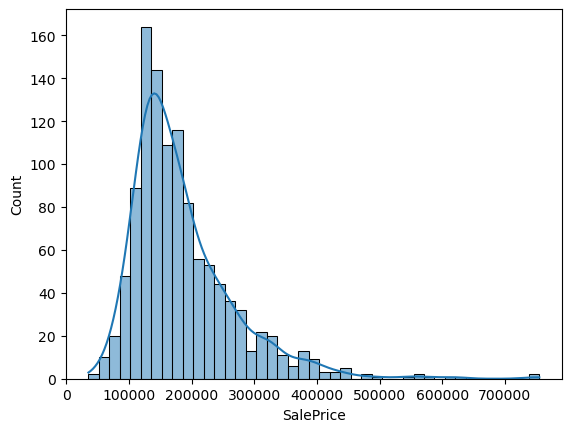

In [38]:
import seaborn as sns
sns.histplot(y, kde=True)


We can inspect the types of feature columns using the following code:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y_binned
)



print("\nTaille du train :", X_train.shape)
print("Taille du test :", X_test.shape)



Taille du train : (896, 37)
Taille du test : (225, 37)


In [ ]:
sns.histplot(X_train, kde=True)


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

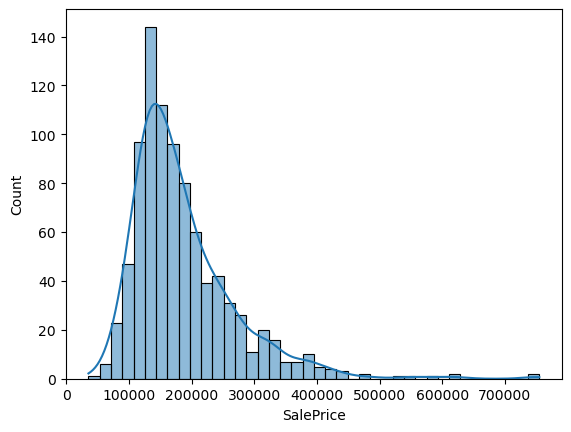

In [52]:
sns.histplot(y_train, kde=True)

## Entrainement du modéle

Now let us take a look at how the house prices are distributed.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModèle entraîné avec succès.")


## Evaluation du modéle

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcul des métriques
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("\n===== Scores du modèle =====")
print(f"RMSE (train) : {rmse_train:.2f}")
print(f"RMSE (test)  : {rmse_test:.2f}")
print(f"R² (train)   : {r2_train:.3f}")
print(f"R² (test)    : {r2_test:.3f}")

In [26]:
##Sauvgarde du modéle

In [27]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("\nModèle sauvegardé sous 'model.pkl'")


Modèle sauvegardé sous 'model.pkl'
